# Predição do alfabeto de sinais

## Libs utilizadas no desenvolvimento

In [6]:
import csv
import string
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Leitura e Modelagem dos Dados

In [3]:
def get_data(filename):
    with open(filename) as training_file:
        training_reader = csv.reader(training_file, delimiter=',')
        image = []
        labels = []
        line_count = 0
        for row in training_reader:
            if line_count == 0:
                line_count +=1
            else:
                labels.append(row[0])
                temp_image = row[1:785]
                image_data_as_array = np.array_split(temp_image, 28)
                image.append(image_data_as_array)
                line_count += 1
        images = np.array(image).astype('float')
        labels = np.array(labels).astype('float')
        print(f'Processed {line_count} lines.')

    return images, labels

In [5]:
train_imgs, train_labels = get_data("../datasets/sign_mnist_train.csv")
test_imgs, test_labels = get_data("../datasets/sign_mnist_test.csv")

print("Total Training images", train_imgs.shape)
print("Total Training labels",train_labels.shape)
print("Total Testing images",test_imgs.shape)
print("Total Testing labels",test_labels.shape)

Processed 27456 lines.
Processed 7173 lines.
Total Training images (27455, 28, 28)
Total Training labels (27455,)
Total Testing images (7172, 28, 28)
Total Testing labels (7172,)


## Vizualização Geral dos Dados

In [19]:
# Mapeamento das letras do alfabeto de acordo com a posição dela
alphabets = string.ascii_lowercase
map_letter =  {}

for i, letter in enumerate(alphabets):
    map_letter[letter] = i
map_letter = {v:k for k, v in map_letter.items()}

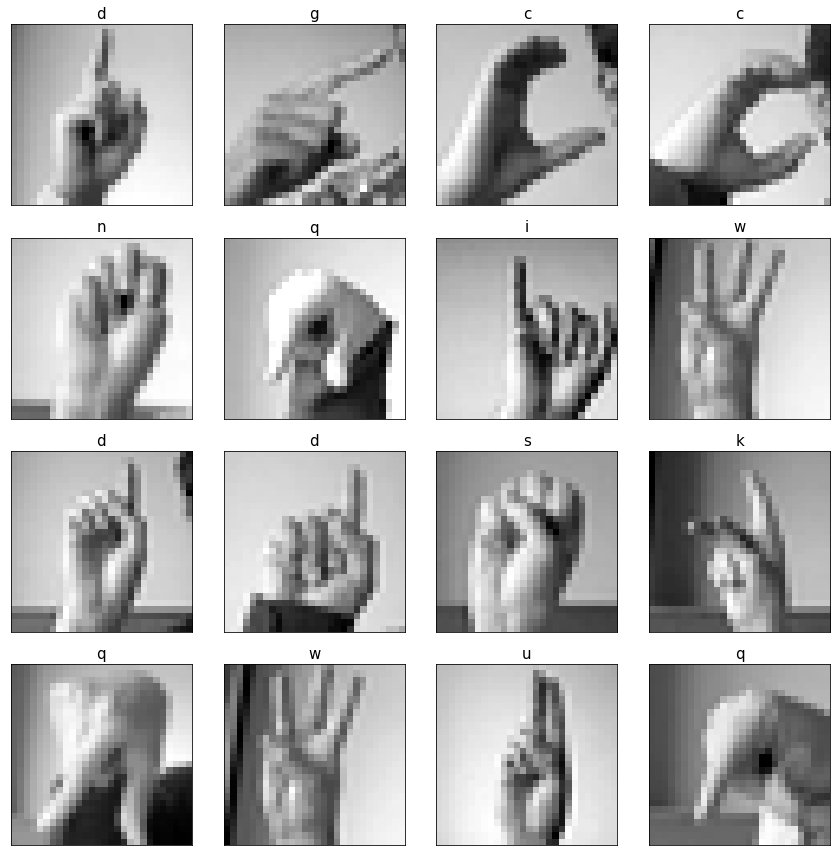

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12,12), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = train_imgs[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    title = map_letter[train_labels[i]]
    ax.set_title(title, fontsize=15)
plt.tight_layout()
plt.show()

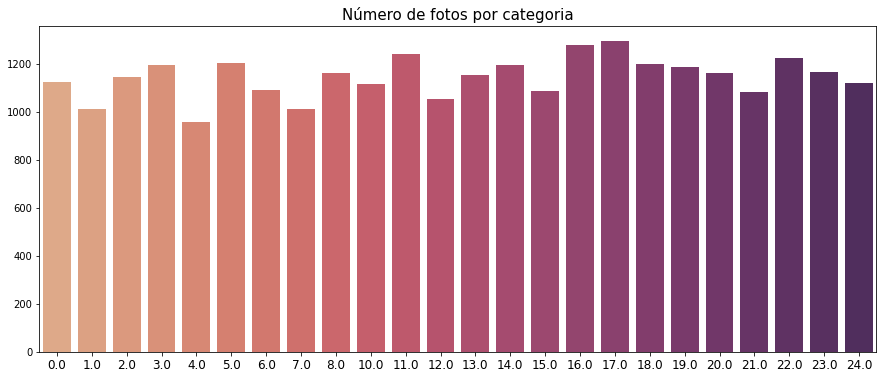

In [24]:
letter_dist = pd.Series(train_labels).value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x=letter_dist.index, y=letter_dist, palette='flare')
plt.title("Número de fotos por categoria", fontsize=15)
plt.xticks(fontsize=12)
plt.show()